# CarDheko-Case Study: Developing a Machine Learning Model to predict the selling price of a used car

Problem Statement:

CarDheko, a reputable used car dealership company, aims to enhance customer satisfaction by providing accurate information and fair prices for their used car inventory. They have provided us with a dataset containing information about the cars they have sold. The challenge at hand is to develop a machine learning model that can reliably predict the selling price of a used car based on its key features, including mileage, fuel type, horsepower, color, transmission, engine size, number of doors, number of cylinders, number of gears, and whether it is a sport model or not. By accomplishing this, we can assist them in offering customers precise and reasonable prices for the used cars they have available.

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading dataset
df=pd.read_csv("Dataset_car_price_prediction.csv")
df

,mon_year,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Cylinders,Gears,Sport_Model,selling_price
0,Oct_2006,49805.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14310.0
1,Oct_2006,77313.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14575.0
2,Sept_2006,44214.0,Diesel,90,Metallic,Manual,2000,3,4,5,0,14787.0
3,Jul_2006,50880.0,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,15847.0
4,Mar_2006,40810.0,Diesel,90,Non-Metallic,Manual,2000,3,4,5,0,14575.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,Dec_2002,21777.0,Petrol,86,Metallic,Manual,1300,3,4,5,1,7950.0
1432,Sept_2002,20140.0,Petrol,86,Non-Metallic,Manual,1300,3,4,5,1,11496.0
1433,Oct_2002,18037.0,Petrol,86,Non-Metallic,Manual,1300,3,4,5,0,9010.0
1434,Nov_2002,17931.0,Petrol,86,Metallic,Manual,1300,3,4,5,0,7685.0


# Data Description

mon_year: The month and year in which the car was first registered. This information can provide insights into the age of the             car, which can impact its price.

KM_driven: The number of kilometres driven by the car. Higher kilometer driven generally leads to a decrease in the selling                 price.

Fuel_Type: The type of fuel used by the car, either Diesel or Petrol. This feature can affect the price, as diesel cars tend to            be more expensive than petrol cars.

Horse_Power: The horsepower of the car's engine. Higher horsepower often correlates with higher prices, as more powerful engines              are generally associated with better performance.

Color: The color of the car, either Metallic or Non-Metallic. Certain colors may be more popular or desirable, which can impact        the price.

Transmission: The type of transmission used by the car, either Manual or Automatic. Automatic transmissions are often preferred                and can influence the price.

Engine: The size of the car's engine in cubic centimeters (cc). Larger engines are typically associated with higher prices.

Doors: The number of doors the car has. More doors can increase the convenience and functionality of the car, potentially              affecting the price.

Cylinders: The number of cylinders in the car's engine. More cylinders usually indicate a more powerful engine and can impact              the price.

Gears: The number of gears in the car's transmission. More gears can provide a smoother driving experience and may influence the        price.

Sport_Model: A binary variable indicating whether the car is a sport model or not. Sport models tend to have higher prices due                to their enhanced performance and features.

selling_price: The target variable, representing the price at which the car was sold.


# Preprocessing Data

In [3]:
#finding shape of dataset
df.shape

(1436, 12)

In [4]:
#Analyzing the information of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mon_year       1436 non-null   object 
 1   KM_driven      1436 non-null   float64
 2   Fuel_Type      1436 non-null   object 
 3   Horse_Power    1436 non-null   int64  
 4   Color          1436 non-null   object 
 5   Transmission   1436 non-null   object 
 6   Engine         1436 non-null   int64  
 7   Doors          1436 non-null   int64  
 8   Cylinders      1436 non-null   int64  
 9   Gears          1436 non-null   int64  
 10  Sport_Model    1436 non-null   int64  
 11  selling_price  1436 non-null   float64
dtypes: float64(2), int64(6), object(4)
memory usage: 134.8+ KB


#### Categorical Columns: mon_year, Fuel_Type, Color, Transmission

#### Numerical Columns: KM_driven, Horse_Power, Engine, Doors,  Gears, Sport_Model, selling_price

In [5]:
#Checking the Null values
df.isnull().sum()

mon_year         0
KM_driven        0
Fuel_Type        0
Horse_Power      0
Color            0
Transmission     0
Engine           0
Doors            0
Cylinders        0
Gears            0
Sport_Model      0
selling_price    0
dtype: int64

<AxesSubplot:>

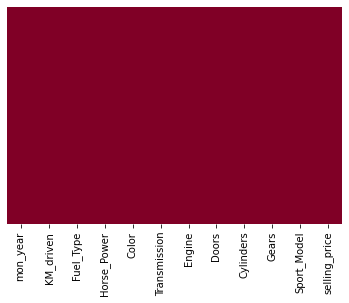

In [6]:
#Ploting Heatmap to vizualise any null values.
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='YlOrRd_r')

There is no null values

In [7]:
#Finding number of unique values in each columns
df.nunique()

mon_year           77
KM_driven        1263
Fuel_Type           3
Horse_Power        12
Color               2
Transmission        2
Engine             13
Doors               4
Cylinders           1
Gears               4
Sport_Model         2
selling_price     236
dtype: int64

In [8]:
# Finding unique values in columns
col=['Fuel_Type','Horse_Power','Color','Transmission','Engine','Doors','Cylinders','Gears','Sport_Model']
for column in col:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()

Unique values in column 'Fuel_Type':
['Diesel' 'Petrol' 'CNG']

Unique values in column 'Horse_Power':
[ 90 192  69 110  97  71 116  98  86  72 107  73]

Unique values in column 'Color':
['Metallic' 'Non-Metallic']

Unique values in column 'Transmission':
['Manual' 'Automatic']

Unique values in column 'Engine':
[ 2000  1800  1900  1600  1400  1598 16000  1995  1398  1300  1587  1975
  1332]

Unique values in column 'Doors':
[3 5 4 2]

Unique values in column 'Cylinders':
[4]

Unique values in column 'Gears':
[5 6 3 4]

Unique values in column 'Sport_Model':
[0 1]



In [9]:
# Dropping Cylinder column as it only have one value throughtout the rows
df=df.drop('Cylinders',axis=1)

In [10]:
# Checking  if there is any duplicate value
df.duplicated().sum()

1

In [11]:
#Removing duplicate data from df
df.drop_duplicates(inplace=True)

In [12]:
#Understanding data for statistical description of data
df.describe()

,KM_driven,Horse_Power,Engine,Doors,Gears,Sport_Model,selling_price
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,72686.082927,101.491986,1576.560976,4.032753,5.026481,0.300348,11364.178397
std,39740.556002,14.981408,424.387533,0.952667,0.188575,0.458569,3825.258392
min,1.000000,69.000000,1300.000000,2.000000,3.000000,0.000000,4611.000000
25%,45580.000000,90.000000,1400.000000,3.000000,5.000000,0.000000,8957.000000
50%,67258.000000,110.000000,1600.000000,4.000000,5.000000,0.000000,10494.000000
75%,92264.000000,110.000000,1600.000000,5.000000,5.000000,1.000000,12667.000000
max,257580.000000,192.000000,16000.000000,5.000000,6.000000,1.000000,34450.000000


# Finding outliers

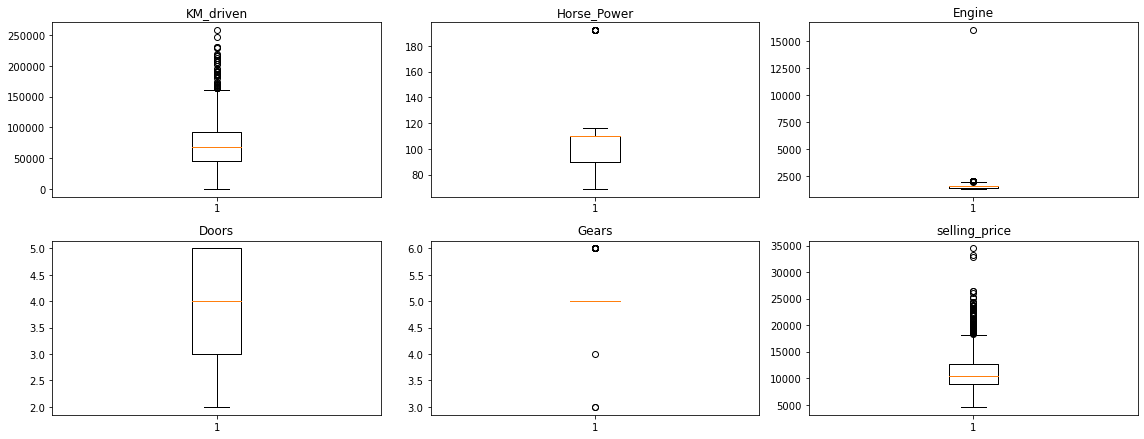

In [13]:
# Select numerical columns
numerical_columns = ["KM_driven", "Horse_Power", "Engine", "Doors", "Gears", "selling_price"]

# Plot box plots for each numerical column
plt.figure(figsize=(16,9))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()

KM_driven, Hourse_Power and Engine have outliers

In [14]:
# Remove outliers in selling_price
df = df[df['selling_price'] < df['selling_price'].quantile(0.99)]

In [15]:
#Finding outlier in Horse_Power
from scipy import stats

# Calculate z-scores for Horse_Power column
z_scores = stats.zscore(df["Horse_Power"])

# Define a threshold for outlier detection (e.g., z-score > 3 or z-score < -3)
threshold = 3

# Find the indices of outliers
outlier_indices = [i for i, z_score in enumerate(z_scores) if abs(z_score) > threshold]

# Print the outliers
outliers = df.iloc[outlier_indices]
print("Outliers in Horse_Power:")
print(outliers['Horse_Power'])


Outliers in Horse_Power:
8     192
10    192
11    192
12    192
13    192
15    192
49    192
53    192
Name: Horse_Power, dtype: int64


The outlier of Horse_Power can be ignored

In [16]:
#Finding outlier in Engine
from scipy import stats
z_scores = stats.zscore(df["Engine"])

# Define a threshold for outlier detection (e.g., z-score > 3 or z-score < -3)
threshold = 3

# Find the indices of outliers
outlier_indices = [i for i, z_score in enumerate(z_scores) if abs(z_score) > threshold]

# Print the outliers
outliers = df.iloc[outlier_indices]
print("Outliers in Engine:")
print(outliers['Engine'])

Outliers in Engine:
80    16000
Name: Engine, dtype: int64


We have to remove this outlier of Engine

In [17]:
# Removing outlier of Engine
index_to_drop = df[df['Engine'] == 16000].index

# Drop the row from the DataFrame
df = df.drop(index_to_drop)

# Reset the index of the DataFrame
df = df.reset_index(drop=True)
df

,mon_year,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Gears,Sport_Model,selling_price
0,Oct_2006,49805.0,Diesel,90,Metallic,Manual,2000,3,5,0,14310.0
1,Oct_2006,77313.0,Diesel,90,Metallic,Manual,2000,3,5,0,14575.0
2,Sept_2006,44214.0,Diesel,90,Metallic,Manual,2000,3,5,0,14787.0
3,Jul_2006,50880.0,Diesel,90,Non-Metallic,Manual,2000,3,5,0,15847.0
4,Mar_2006,40810.0,Diesel,90,Non-Metallic,Manual,2000,3,5,0,14575.0
...,...,...,...,...,...,...,...,...,...,...,...
1413,Dec_2002,21777.0,Petrol,86,Metallic,Manual,1300,3,5,1,7950.0
1414,Sept_2002,20140.0,Petrol,86,Non-Metallic,Manual,1300,3,5,1,11496.0
1415,Oct_2002,18037.0,Petrol,86,Non-Metallic,Manual,1300,3,5,0,9010.0
1416,Nov_2002,17931.0,Petrol,86,Metallic,Manual,1300,3,5,0,7685.0


In [18]:
#Finding outlier in KM_driven
from scipy import stats
z_scores = stats.zscore(df["KM_driven"])

# Define a threshold for outlier detection (e.g., z-score > 3 or z-score < -3)
threshold = 3

# Find the indices of outliers
outlier_indices = [i for i, z_score in enumerate(z_scores) if abs(z_score) > threshold]

# Print the outliers
outliers = df.iloc[outlier_indices]
print("Outliers in KM_driven:")
print(outliers['KM_driven'])

Outliers in KM_driven:
168     257580.0
360     228960.0
361     210057.0
585     217300.0
586     216505.0
587     206218.0
588     202354.0
589     194510.0
1026    246916.0
1027    231205.0
1028    230830.0
1029    219541.0
1030    215449.0
1031    212776.0
1032    209351.0
1033    206451.0
1034    203117.0
1035    194274.0
Name: KM_driven, dtype: float64


These outliers can be ignored because KM_driven can be any value

# Data Exploration

#### Plotting the distribution of selling prices

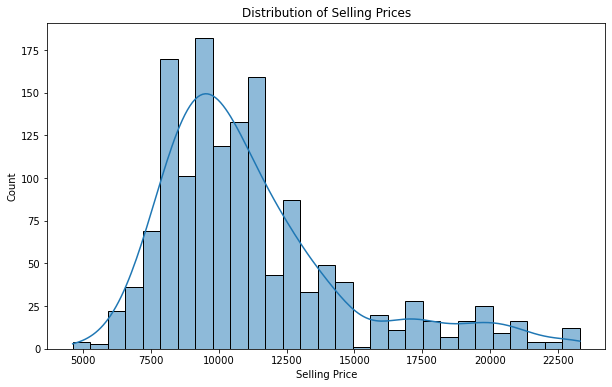

In [19]:
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Count')
plt.show()

We can see that the plot is right skewed.

#### Computing the correlation matrix

In [20]:
corr_matrix = df.corr()
corr_matrix

,KM_driven,Horse_Power,Engine,Doors,Gears,Sport_Model,selling_price
KM_driven,1.000000,-0.329145,0.341610,-0.023584,0.016474,-0.037115,-0.567860
Horse_Power,-0.329145,1.000000,0.025864,0.094525,0.200061,-0.008825,0.286187
Engine,0.341610,0.025864,1.000000,0.115862,0.040258,-0.059824,0.091849
Doors,-0.023584,0.094525,0.115862,1.000000,-0.157507,-0.134018,0.169190
Gears,0.016474,0.200061,0.040258,-0.157507,1.000000,0.172347,0.064927
Sport_Model,-0.037115,-0.008825,-0.059824,-0.134018,0.172347,1.000000,0.154454
selling_price,-0.567860,0.286187,0.091849,0.169190,0.064927,0.154454,1.000000


#### Generate a correlation heatmap

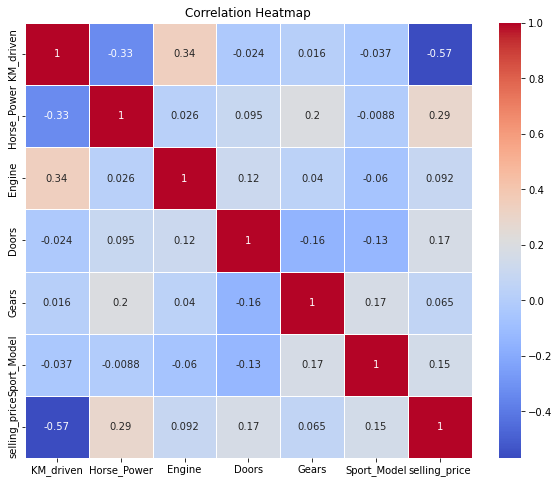

In [21]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

KM_driven and selling price is negatively correlated.

Horse_Power and selling price are moderately positively correlated.

Engine, Doors and Sport_Model are Weakly positively correlated with selling_price

Gears and selling_price are very less correlated i.e. not correlated.

In [22]:
# Removing Gears column as it is very less correlated and will not help us in further prediction.
df=df.drop('Gears',axis=1)

#### Plotting the relationship between kilometers driven and selling price

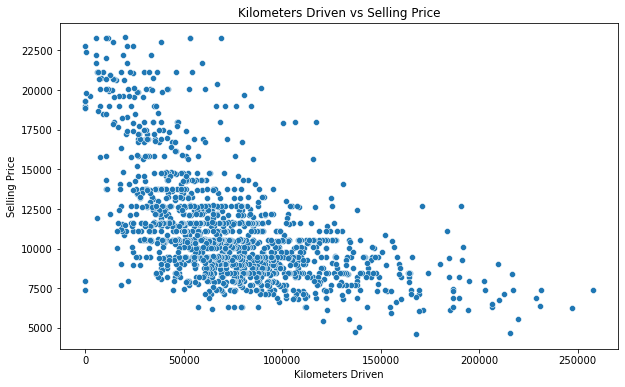

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='KM_driven', y='selling_price', data=df)
plt.title('Kilometers Driven vs Selling Price')
plt.xlabel('Kilometers Driven')
plt.ylabel('Selling Price')
plt.show()

We can see that as the Kilometers Driven increases, the selling price decreases.

#### Plotting the count of cars by fuel type

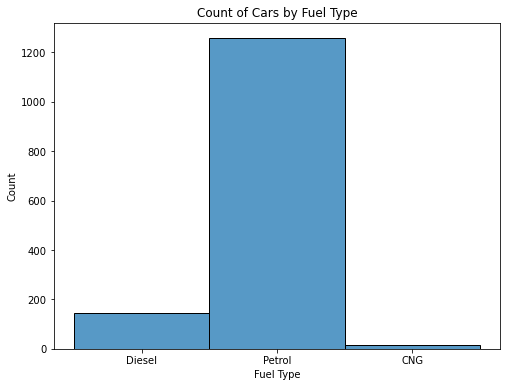

In [24]:
plt.figure(figsize=(8, 6))
sns.histplot(df['Fuel_Type'])
plt.title('Count of Cars by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Count')
plt.show()

We can see that the Petrol type car has the heighest count.

#### Plotting the relationship between fuel type and selling price

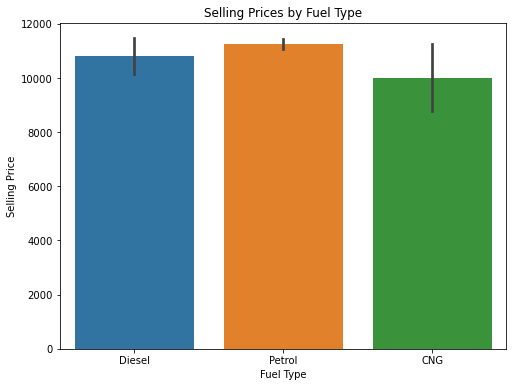

In [25]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Fuel_Type', y='selling_price', data=df)
plt.title('Selling Prices by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Selling Price')
plt.show()

We can see that the Diesl car have heighest selling price.

#### Plotting the average selling price by transmission type

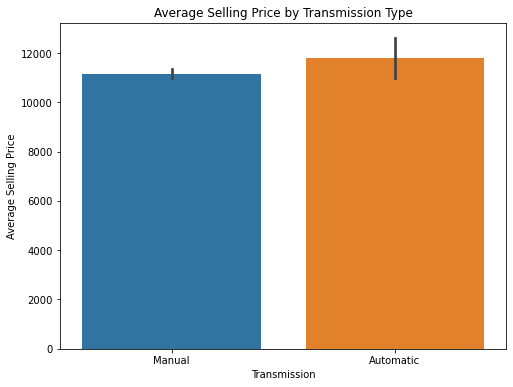

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Transmission', y='selling_price', data=df)
plt.title('Average Selling Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Average Selling Price')
plt.show()

'Automatic' Transmission type has slightly higher Selling price that the 'Manual' type.

#### Plotting a boxplot of selling prices by color

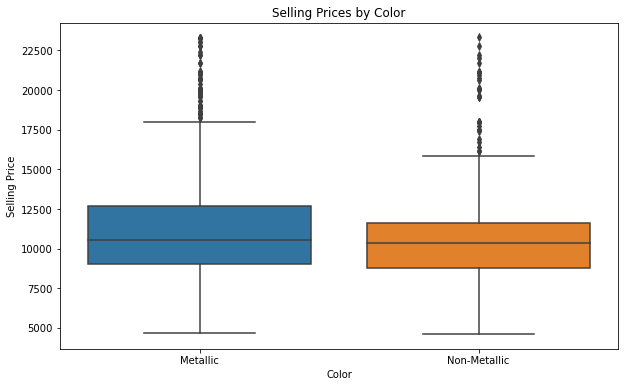

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Color', y='selling_price', data=df)
plt.title('Selling Prices by Color')
plt.xlabel('Color')
plt.ylabel('Selling Price')
plt.show()

Metallic color car have slightly higher Median selling price that Non-Metallic color car.

#### Plotting the relationship between horsepower and selling price

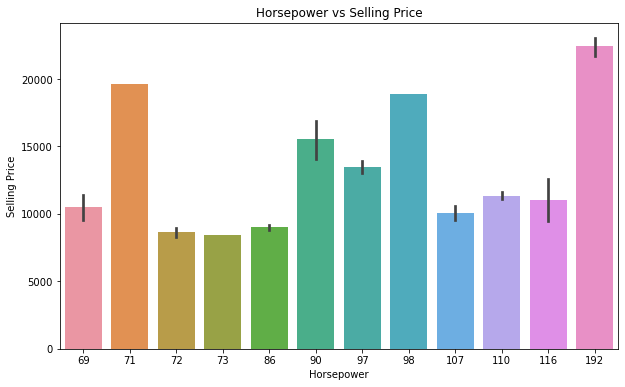

In [28]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Horse_Power', y='selling_price', data=df)
plt.title('Horsepower vs Selling Price')
plt.xlabel('Horsepower')
plt.ylabel('Selling Price')
plt.show()

It is randomly distributed

#### Plotting the relationship between engine size and selling price

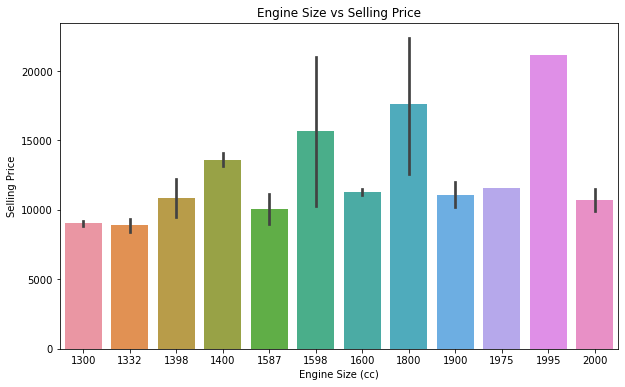

In [29]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Engine', y='selling_price', data=df)
plt.title('Engine Size vs Selling Price')
plt.xlabel('Engine Size (cc)')
plt.ylabel('Selling Price')
plt.show()

It is randomly distributed

#### Plotting the relationship between number of doors and selling price

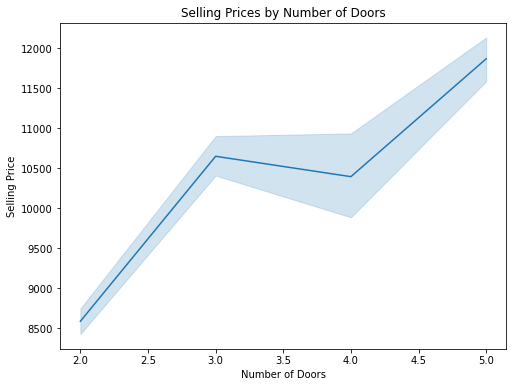

In [30]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='Doors', y='selling_price', data=df)
plt.title('Selling Prices by Number of Doors')
plt.xlabel('Number of Doors')
plt.ylabel('Selling Price')
plt.show()

As the number of doors are increasing, the selling price is increasing.

#### Plotting the relationship between sports model and selling price

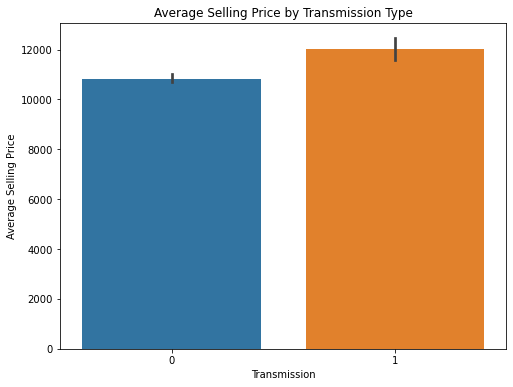

In [31]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sport_Model', y='selling_price', data=df)
plt.title('Average Selling Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Average Selling Price')
plt.show()

Sports model have higher selling price.

# Multivariate analysis

#### Creating a pair plot to visualize relationships between multiple variables

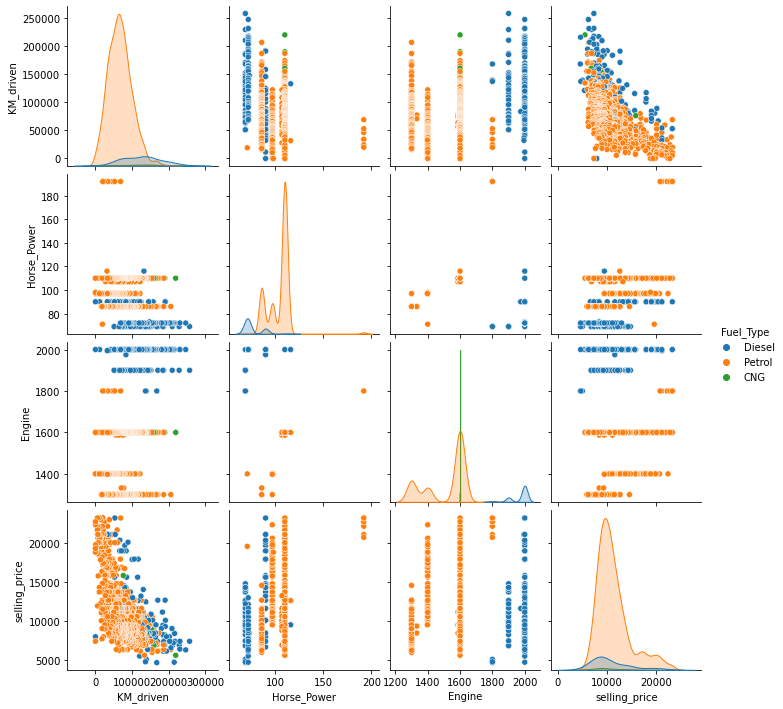

In [32]:
sns.pairplot(df, vars=['KM_driven', 'Horse_Power', 'Engine', 'selling_price'], hue='Fuel_Type')
plt.show()

#### Plotting the relationship between horsepower and selling price, grouped by fuel type

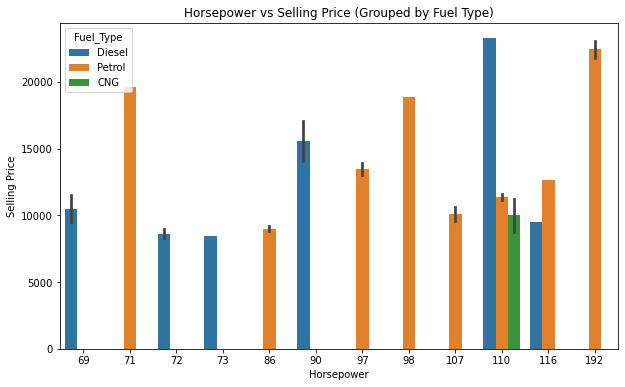

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Horse_Power', y='selling_price', hue='Fuel_Type', data=df)
plt.title('Horsepower vs Selling Price (Grouped by Fuel Type)')
plt.xlabel('Horsepower')
plt.ylabel('Selling Price')
plt.show()

CNG type fuel have same Horsepower 

#### Plotting the relationship between engine size and selling price, grouped by transmission type

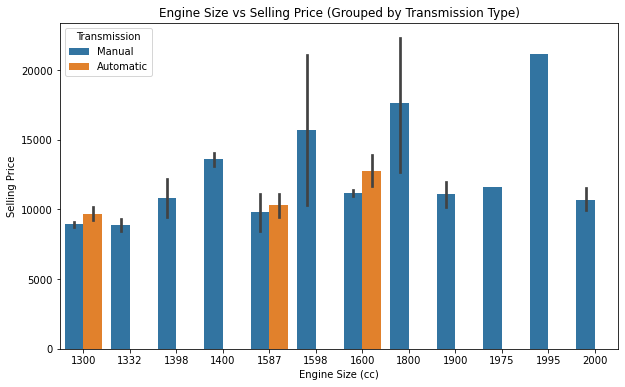

In [34]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Engine', y='selling_price', hue='Transmission', data=df)
plt.title('Engine Size vs Selling Price (Grouped by Transmission Type)')
plt.xlabel('Engine Size (cc)')
plt.ylabel('Selling Price')
plt.show()

Higher CC engine have only Manual transmission mode and selling price is generally higher for higher cc car

# Data Preparation

Checking the data for machine learning model.

In [35]:
# Extract month and year
df[['Month', 'Year']] = df['mon_year'].str.split('_', expand=True)

In [36]:
# convert Year to numeric
df['Year'] = pd.to_numeric(df['Year'])
# Define a dictionary mapping month names to numeric values
month_mapping = {'Jan': 1,
                 'Feb': 2,
                 'Mar': 3,
                 'Apr': 4,
                 'May': 5,
                 'Jun': 6,
                 'Jul': 7,
                 'Aug': 8,
                 'Sept': 9,
                 'Oct': 10,
                 'Nov': 11,
                 'Dec': 12}
# Convert the Month column from string to numeric using the mapping
df['Month'] = df['Month'].map(month_mapping)

#### Creating a Current_Age column of the used car

In [37]:
from datetime import datetime
# Calculate the current age(in years) based on the "Month" and "Year" columns
current_year = datetime.now().year
current_month = datetime.now().month

df['Current_Age'] = current_year - df['Year']
df.loc[df['Month'] > current_month, 'Current_Age'] -= 1

#### Drop original mon_year columns

In [38]:
df = df.drop('mon_year', axis=1)

In [39]:
#Analyzing dataframe again
df

,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Sport_Model,selling_price,Month,Year,Current_Age
0,49805.0,Diesel,90,Metallic,Manual,2000,3,0,14310.0,10,2006,16
1,77313.0,Diesel,90,Metallic,Manual,2000,3,0,14575.0,10,2006,16
2,44214.0,Diesel,90,Metallic,Manual,2000,3,0,14787.0,9,2006,16
3,50880.0,Diesel,90,Non-Metallic,Manual,2000,3,0,15847.0,7,2006,17
4,40810.0,Diesel,90,Non-Metallic,Manual,2000,3,0,14575.0,3,2006,17
...,...,...,...,...,...,...,...,...,...,...,...,...
1413,21777.0,Petrol,86,Metallic,Manual,1300,3,1,7950.0,12,2002,20
1414,20140.0,Petrol,86,Non-Metallic,Manual,1300,3,1,11496.0,9,2002,20
1415,18037.0,Petrol,86,Non-Metallic,Manual,1300,3,0,9010.0,10,2002,20
1416,17931.0,Petrol,86,Metallic,Manual,1300,3,0,7685.0,11,2002,20


### Encoding categorical variables

In [40]:
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['Fuel_Type', 'Color', 'Transmission']
label_encoder = LabelEncoder()

for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

### Scaling the numerical features

In [41]:
from sklearn.preprocessing import StandardScaler
numerical_cols = ['KM_driven', 'Horse_Power', 'Engine','Doors','Current_Age']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Feature Engineering:

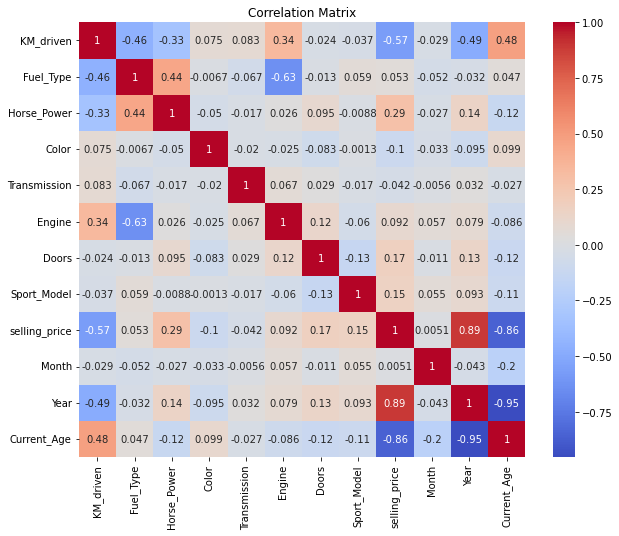

In [42]:
# Calculate the correlation matrix
correlation_matrix =df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We will be selecting all the features except 'Month' and 'Year' because we have already used it in 'Current_Age'.

And all other column have correlation.

## Split the data into features (X) and target variable (y)

In [43]:
X = df.drop(['selling_price','Month','Year'], axis=1)
y = df['selling_price']

### Feature Extraction

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
X_train

,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Sport_Model,Current_Age
660,0.894280,2,0.608557,1,1,0.201699,1.023773,0,0.572306
1389,-0.652917,2,0.608557,1,1,0.201699,1.023773,0,0.572306
584,-1.023872,2,-0.292426,1,1,-0.895932,-1.077110,0,-0.077438
1053,2.203707,1,-2.025087,0,1,2.375226,1.023773,1,0.572306
1106,1.119444,2,0.608557,0,1,0.201699,-1.077110,0,1.222050
...,...,...,...,...,...,...,...,...,...
1095,1.253338,2,0.608557,1,1,0.201699,-0.026668,0,0.572306
1130,0.854188,2,-1.054797,1,1,-1.428447,-1.077110,0,1.222050
1294,-0.005822,2,0.608557,0,1,0.201699,1.023773,0,1.222050
860,-0.192767,2,-1.054797,0,1,-1.428447,-1.077110,1,-0.077438


In [46]:
y_train

660     10489.0
1389     8745.0
584      9487.0
1053     8215.0
1106     7685.0
         ...   
1095     6095.0
1130     7155.0
1294    10547.0
860      9010.0
1126     8215.0
Name: selling_price, Length: 1134, dtype: float64

# Applying linear regression to find the selling price

In [47]:
# Create the linear regression model

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [48]:
# Train the model

model.fit(X_train, y_train)

LinearRegression()

In [49]:
# Make predictions on the validation set

y_pred = model.predict(X_test)

# Evaluating the model

In [50]:
# Calculate mean squared error (MSE)

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 2298173.3558954448


In [51]:
# Calculate root mean squared error (RMSE)

from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error (RMSE):", rmse)

Root Mean Squared Error (RMSE): 1515.9727424645355


In [52]:
# Calculate Mean Absolute Error (MAE)

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 1134.524733161588


In [53]:
# Calculate R-squared (R2) Score

from sklearn.metrics import r2_score

r2 = r2_score(y_test, y_pred)
print("R-squared (R2) Score:", r2)

R-squared (R2) Score: 0.7576431302078402


### The R-squared value comes out to be 0.75

# Predicting the selling price with some new data

In [54]:
import pandas as pd

# Create new_data DataFrame with arbitrary feature values
new_data = pd.DataFrame({
    'KM_driven': [0.74280,0.713888],
    'Fuel_Type': [1,2],
    'Horse_Power': [0.508557,-1.254797],
    'Color': [0,1],
    'Transmission': [1,0],
    'Engine': [0.301699,-1.728447],
    'Doors': [1.523773,-1.077110],
    'Sport_Model': [1,0],
    'Current_Age': [0.672306,1.522050]
})

print("new_data:")
new_data

new_data:


,KM_driven,Fuel_Type,Horse_Power,Color,Transmission,Engine,Doors,Sport_Model,Current_Age
0,0.742800,1,0.508557,0,1,0.301699,1.523773,1,0.672306
1,0.713888,2,-1.254797,1,0,-1.728447,-1.077110,0,1.522050


In [55]:
# Make predictions on the new data
y_pred_new = model.predict(new_data)

print("Predicted selling price for new data:")
print(y_pred_new)

Predicted selling price for new data:
[10310.34266782  5876.89286614]


This model successfully utilized a Linear Regression model to predict selling prices of used Cars. The predicted prices were reasonable and aligned with market trends.

# Conclusion

In conclusion, this project successfully developed a Linear Regression model to accurately predict the selling price of used cars based on their features. The model provides the client with valuable insights for fair and reasonable pricing, enhancing customer satisfaction and optimizing their business operations in the used car market.This project lays a solid foundation for data-driven decision making and pricing strategies in the automotive industry. Ongoing data collection and evaluation will ensure the model's continued effectiveness.